<br>

# MACHINE LEARNING MODULE TASKS 2020

In this notebook I am including the 4 tasks to complete for this Machine Learning module. Please navigate through the different tasks and find brief description of what needs to be done, references and all markdown and code cells explaining the processes and how to run the code. 



<br>

## Task 1: 

*Create a Python function called 'sqrt2' that calculates and prints to the screen the square root of 2 to 100 decimal places. Remember that your code should not depend on any module from the standard library or otherwise.* 
***
References: 

- [Map function use](https://www.programiz.com/python-programming/methods/built-in/map)

- [Reduce function use](https://www.geeksforgeeks.org/reduce-in-python/)

- [Floating Point Arithmetic: Issues and limitations](https://docs.python.org/3/tutorial/floatingpoint.html)

- [mpmath library documentation](https://mpmath.org/)

- [Floating point arithmetic:Issues and limitations](https://docs.python.org/3.4/tutorial/floatingpoint.html)

- [abs() in Python ](https://www.geeksforgeeks.org/abs-in-python/)

***




In [9]:

import math
import numpy as np

def sqrt2(n): #I created this function to find the square root of any number ( in our case 2), using the math module.
    return math.sqrt(2)
                   


print('This is the square root of 2: ',(sqrt2(2)))


This is the square root of 2:  1.4142135623730951


<br>

Now in regard to printing this value with 100 decimal places, I encountered difficulties as it seems that Python has some limitations with the number of decimal places that it can produce as found in this [documentation](https://docs.python.org/3/tutorial/floatingpoint.html)

Looking for a way to do this task without importing any modules I found this [post](https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra)
Which solution I have attached below: 

In [10]:
#code solution from link listed in above markdown cell:

x=2*10**200
r=x

def sqrt2(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    return minimised, below_min

while True:
    oldr = r
    r = (r + x // r) // 2

    minimised, below_min = sqrt2(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = sqrt2(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}')



1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


<br>

My understanding is that the code is using the abs () function to return the absolute value of the float and using if statements to iterate. Once this is done the print statement is setting the format for the integer part of the value and the fraction part. 

Having checked this code, I wondered if it was possible to do this in a different way, maybe converting the float into a string and then go through all the characters. See my attempt in the cell below: 

<br>


## Task 2:

*Given the table below extracted from the Wikipedia article for the Chi-squared test which states that the Chi-squared value based on it is approximately 24.6 . Use module scipy.stats to verify this value and calculate the associated *p* value.*

***
References:

- [Chi-squared Wikipedia page](https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096)

- [How to do a chi-square test for independence](https://stattrek.com/chi-square-test/independence.aspx)

- [introduction to chi-squared test for machine learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ )

- [Scipy stats chi2 contingency documentation ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

- [Scipy stats contengency expected frequency function documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq)

***

The Chi-squared test is performed when the test statistics is chi-squares distributed. We perform a Pearson's chi-squared test in order to determine whether there is a statistically significant difference between expected and observed frequencies in or more categories of a contingency table. In this case we work with 3 categories/classes (white collar, blue collar or non-collar) and 4 variables representing different neighbourhoods (A, B, C and D).

In order to confirm the approximate Chi-squared value of 24.6 and find 'p' based on the example contingency table [here](https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096), I have followed the steps detailed below: 

- 1. First, I have imported the necessary modules and create my observations table as numpy array. 

- 2. Within the module 'scipy stats contingency' I have used 'expected_freq' function to find and print a table with the expected frequencies from our contingency table containing the observation values. 
For some parts of the code I used this [source](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ 
).



In [11]:


#I imported the necessary modules first
import numpy as np 
from scipy.stats import chi2_contingency
from scipy.stats.contingency import expected_freq 

table= np.array([[90,60,104,95], #Creating contingency table with observed values
                  [30,50,51,20],
                  [30,40,45,35],
                  ])
print (table)# I print the table with the observed values

observed = table 
expected_freq(observed)#I use this function to create and print the arrays of expected frequency values 


[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]


array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]])

<br>

- 3. Then I confirmed the degree of freedom is 6 with the function detailed in [Python SciPy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
- 4. Having dof , I was able to use chi2_contingency function to confirm 'p' and Chi-Squared value. 

In [12]:
#Now we need to find the 'p'value and confirm that the Chi-squared value is 24.6.

dof = observed.size - sum(observed.shape) + observed.ndim - 1 #Confirming degree of freedom in this case is 6

print('dof value:',dof) # confirming dof is correct

#to find p:

chi2, p, dof, ex = chi2_contingency(observed, correction=False)

print('chi2 value:',chi2) # printing this value we can see that it is correct, and we can confirm 'p' value is then also correct

print('p value:',p)

dof value: 6
chi2 value: 24.5712028585826
p value: 0.0004098425861096696


<br>


## Task 3:

*The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).
 
 *However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x). Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.*
 
 ***
 References:

- [Numpy STD documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html?highlight=standard%20deviation)
- [Microsoft documentation STDEV in Excel](https://support.microsoft.com/en-us/office/stdevp-function-1f7c1c88-1bec-4422-8242-e9f7dc8bb195)
- [Difference between STEDV.P and STEDV.S](https://www.youtube.com/watch?v=NdIVwuwfMIg&ab_channel=DesigneLearningTutorials)


***
 

<br>


### Standard deviaton using Excel:

The standard deviation indicates us how far an observed value is from the average.

**Standard deviation using STDEV.P :**
Calculates standard deviation using the entire population. 


**Standard deviation using STEDV.S:**
This function calculates the standard deviation using a sample of the population. Due to this reason the calculation of the division is by len(x)-1 while with STEDV.P it is len(x). 


<br>


### Standard deviaton using numpy: 

In order to calculate the standard deviation using numpy , we have the formula np.sqrt(np.sum((x - np.mean(x))** 2)/len(x))  as seen below. Let's see a practical example using this package: 


In [13]:
#Calculating standard deviation using numpy package: 

#first I imported the necessary packages

import numpy as np 

#Using two of the arrays from the previous task as example
x=  np.array([30,50,51,20])

np.sqrt(np.sum((x - np.mean(x))**2)/len(x))#This function canculates the standard deviation of a population. 



13.235841491949047

<br> 

As seen in the example above, the formula calculates the standard deviation of a population.
In order to calculate the standard deviation of a sample we need to use the optional parameter 'ddof' (delta degrees of freedom), which is '0'by default. Adding a value for this parameter changes the way std is calculated as N is no longer consider the whole population, if ddof is specified the divisor 'N - ddof 'is used instead.
See same example below passing this value: 

In [14]:
#let's try now to calculate the standard deviation of a sample using numpy std including ddof parameter: 

x=  np.array([30,50,51,20])#considering again the same array

np.std(x,ddof=1)




15.283433296656002

<br>

Using std can be inaccurate[(source)](https://numpy.org/doc/stable/reference/generated/numpy.std.html), therefore a way to be more precise is to use float64 as dtype. Example below:


In [15]:
x=  np.array([30,50,51,20])#considering again the same array

print(np.std(x, dtype=np.float64))#with float64


13.235841491949047


<br> 

Now using numpy and same [contingency table](https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096) from task 2,  I can compare the values obtained with Python against the same values obtained using Excel STDEV.S and STDEV.P to see if there is any difference.


<br>

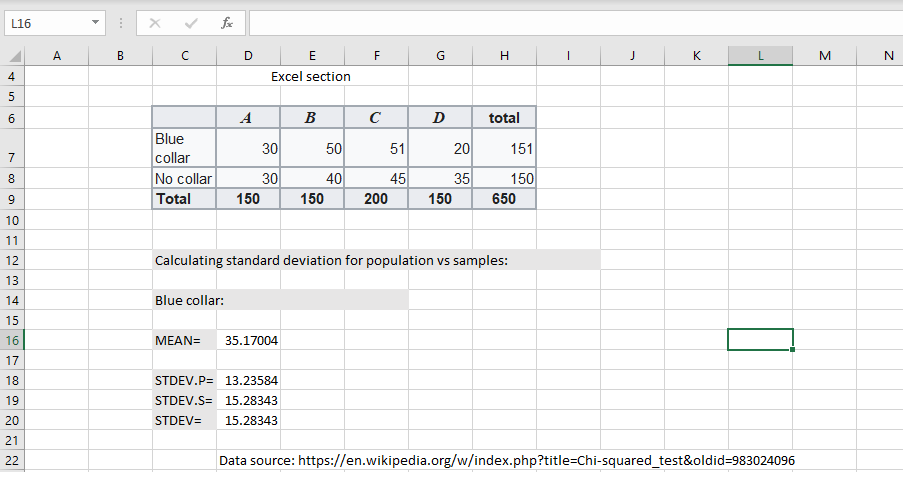

<br>

Looking at the image above these lines, my understanding is that the calculation of the std for both sample and population is more accurate using Numpy as it includes all decimals while Excel is only including a few. 
In relation to STDEV.S being better estimate for the standard deviation of a population when performed on a sample, I see that the value we obtained is the same as the one with numpy ( with more decimals) then we can say that STDEV.S is equivalent of the default standard deviation with Numpy. Therefore it seems to be more accurate using STDEV.S function to estimate the standard deviation of a population. 


<br>


## Task 4:

*Using module scikit-learn  apply k-means clustering to Fisher’s famous Iris dataset. You will easily obtain a copy of the dataset online. Explain in a Markdown cell how your code works and how accurate it might
be, and then explain how your model could be used to make predictions of species of iris.*
***
References:

- [K-means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

- [K-Means clustering further documentation](https://www.datacamp.com/community/tutorials/k-means-clustering-python)

- [Last semester Iris dataset analysis and prediction model](https://github.com/Ainara12/Pands-project/blob/master/machinelearning.py)

- [Kmeans clustering documentation for iris dataset](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py)

- [Scikit learn clustering analysis with the Iris dataset](https://www.youtube.com/watch?v=asW8tp1qiFQ&ab_channel=DragonflyStatistics)

- [Sklearn datasets documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

- [Teacher github notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/kmeans-examples.ipynb)

- [Machine learning tutorial-K Means Clustering](https://www.youtube.com/watch?v=EItlUEPCIzM&ab_channel=codebasics)



<br> 

### Using scikit-learn K-means clustering: 

Using the famous Fisher's Iris dataset which we analysed last semester. My task consists of applying 'scikit-learn' 'k-means' clustering to create a model that can predict the species of iris to which a flower belongs. 

Last semester I used 'sklearn.neighbors' module to predict this , based on the K nearest neighbors algorithm.
Now we are using the clustering technique for this task. 

**Clustering** is a technique that consists on grouping together a set of objects in a cluster or group. The objects in this cluster are similar to each other and share more characteristics than with objects in other clusters.

First, I am going to show the original dataset and plot to see its characteristics and have a better idea about it. 

In [20]:

#I import the necessary modules:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Now I load Fisher's Iris Dataset from my repository and print the heading to see its structure: 

df=pd.read_csv(r"C:\Users\fainl\OneDrive\Documents\GMITSEP2020\Machine learning -tasks\Machine Learning-Tasks\Irisdataset.csv", encoding = "utf-8")

df.reset_index(drop=True, inplace=True)


df.head()





,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:

#printing some describing statistics to see what can be the assumptions taken from this dataset:

print(df.describe()) 


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<br>

We can see with describe function what is the mean and standard deviation of the different parameters we can use to categorise the iris flowers (sepal length, sepal width, petal length and petal width) in cm.


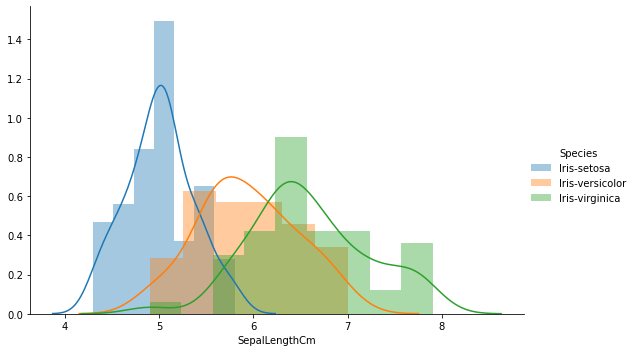

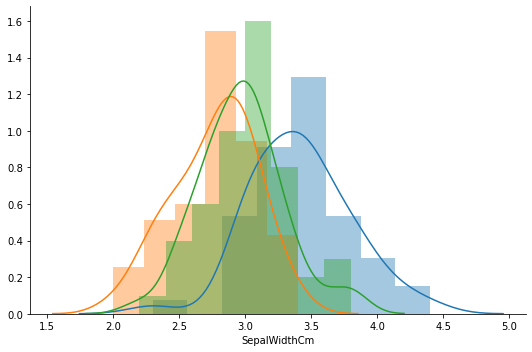

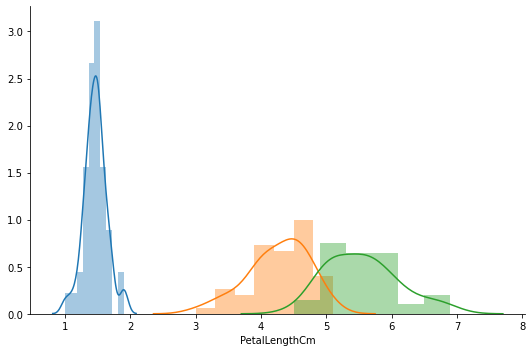

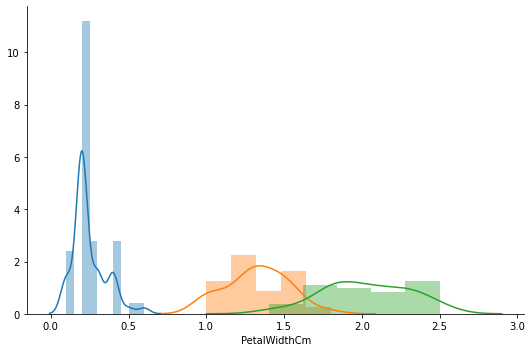

In [22]:
#Plotting dataset before using K-Means: 
#to see the comparison between sepal length and width between the 3 species

sns.FacetGrid(df,hue="Species",height=5,aspect=1.5).map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=5,aspect=1.5).map(sns.distplot,"SepalWidthCm")
sns.FacetGrid(df,hue="Species",height=5, aspect=1.5).map(sns.distplot,"PetalLengthCm")
sns.FacetGrid(df,hue="Species",height=5, aspect=1.5).map(sns.distplot,"PetalWidthCm")

plt.show()

<br>

Observing the facetgrid above, we can see that in general setosa species of iris flowers seem to be clearly differentiated in dimensions from the other two species. Setosas seem to have longer sepals along with generally smaller petals. Between versicolor and virginica, which have in general wider petals than setosas, there is not much differentiation.


In [23]:
#Now loading dataset from sklearn library

#First I import the necessary modules and load dataset
import numpy as np #we will needed at the end to enter values for prediction

#I am using this inbuilt dataset as it has already the features needed
from sklearn.datasets import load_iris

iris = load_iris()

iris.data

print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

<br>

Printing the dataset we can see that only includes values, the species tab for example is not present here as in the original dataset I used last semester. 
Now we are building the model following our lecturer's video demonstration along with other resources I detailed in my references section. 

In [ ]:
#Building the model:

iris.target


<br> 
Generating the targets we get 3 labels (0,1,2) each of them corresponds with one of the species of iris flower included on the dataset. 

1=Setosa
0=Versicolor
2=Virginica

In [25]:
#Needed to import this to apply KMeans 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) #I specify 3 clusters for each of the 3 species



In [26]:
kmeans

KMeans(n_clusters=3)

In [27]:
KMmodel = kmeans.fit(iris.data) #Now I use this training data (our iris dataset) and using kmeans algorithm to fit a 
#model using said data


In [28]:
KMmodel#Run the model

KMeans(n_clusters=3)

In [29]:
KMmodel.labels_ #The algorithm show us the labels, 50 of each label for this dataset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<br>
Now the dataset is trained we are going to enter two new flowers or specimens set of measurements as an array to predict to which label they belong to. 

In [30]:
newspecimens=np.array([[2.1,1.0,1.0,0.2],[4.9,3.4,2.1,0.5]])

prediction=kmeans.predict(newspecimens)

print(prediction)

[1 1]


<br>

In this case adding the values of two new specimens, it seems that the two of them belong to label 1(iris setosa). 
But following this [tutorial](https://www.youtube.com/watch?v=EItlUEPCIzM&ab_channel=codebasics) I added cluster column to my data frame, and we can confirm here that this new specimens must be part of iris setosa as seen below in the classification.

In [31]:
#Plotting the prediction:

df['cluster']=KMmodel.labels_  #I create data frame showing the cluster which every species belong as detailed in previous
#cells
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


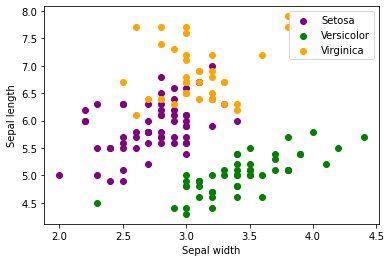

In [32]:
#Now I separate the clusters into dataframes to see the clusters separated by color in relation to their sepal dimensions

df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

Setosa=plt.scatter(df1.SepalWidthCm,df1.SepalLengthCm, color='purple')
Versicolor=plt.scatter(df2.SepalWidthCm,df2.SepalLengthCm, color='green')
Virginica=plt.scatter(df3.SepalWidthCm,df3.SepalLengthCm, color='orange')


plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

plt.legend([Setosa,Versicolor,Virginica], ['Setosa','Versicolor','Virginica'])



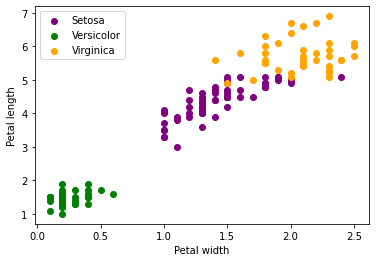

In [33]:
#Now I plot the petal dimensions separated by color

Setosa=plt.scatter(df1.PetalWidthCm,df1.PetalLengthCm, color='purple')
Versicolor=plt.scatter(df2.PetalWidthCm,df2.PetalLengthCm, color='green')
Virginica=plt.scatter(df3.PetalWidthCm,df3.PetalLengthCm, color='orange')


plt.xlabel('Petal width')
plt.ylabel('Petal length')

plt.legend([Setosa,Versicolor,Virginica], ['Setosa','Versicolor','Virginica'])




<br>

### Using Sklearn K Nearest Neighbours:

***
References: 

- [kNN tutorial](https://www.youtube.com/watch?v=Y17Y_8RK6pc&ab_channel=LucidProgramming)

- [Scikit-learn Nearest Neighbours documentation](https://scikit-learn.org/stable/modules/neighbors.html#classification)

***

For the last part of this task we were asked to perform an analysis of the Iris dataset, using sklearn KNN ( K Nearest Neighbours). The first part of this task consisted in an analysis using K-means clustering which is an unsupervised method , meaning that it searches for previously unknown pattern within the dataset and this contains unlabelled responses without human interaction. 
On the other hand, the sklearn neighbours offers functionality for unsupervised and supervised neighbours-based learning methods. The principle behind these methods is to find a few training samples which are closest in distance to the new point provided and then predict the label from these. 

Let's see how we can do this using our Iris dataset as we did for K-means.



In [36]:

#As detailed in markdown cells above we are taking the iris flowers dataset and predict to which species a new flower belongs
#by considering its measurements

#First, I imported the necessary libraries
from sklearn.datasets import load_iris #this is the built-in dataset in sklearn
from sklearn.model_selection import train_test_split#I imported the model from library
from sklearn.neighbors import KNeighborsClassifier#This model is going to allow us to use K nearest neighbors algorithm 
import numpy as np #I also import numpy for arrays
import matplotlib.pyplot as plt #I import this for plotting

iris= load_iris() #first we load dataset, take into account is loaded in previous section but you can tun this separately

print( iris.keys()) #With  this option I am showing the keys stored as dictionary in this library

print(iris)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],

<br>

Once we have imported our modules, loaded our dataset and dictionary keys as shown in the cell above. We need to separate the 4 features of this dataset( flower measurements : sepal length, sepal width, petal length and petal width).

In [37]:
#Then in order to separate the 4 features (sepal length, sepal width, petal length and petal width )
#I create variables for each of them

features = iris.data.T

sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]

sepal_length_label = iris.feature_names[0]
sepal_width_label =iris.feature_names[1]
petal_length_label = iris.feature_names[2]
petal_width_label = iris.feature_names[3]

print(features)



[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
  2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
  2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
  2.6 3.  2.

<br>

Now we can plot these features and see the correlation between the sepal and petal measurements in different species of iris flowers represented by different colors.

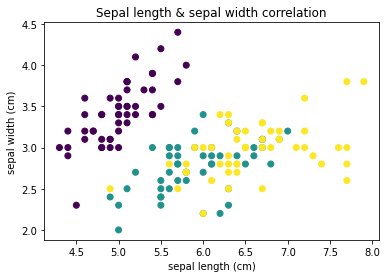

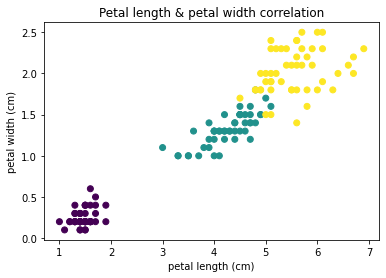

In [38]:
#In order to display the scatter plots, run command plt.show()
#Scatter plot 1:

plt.scatter(sepal_length, sepal_width, c=iris.target)
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)
plt.title("Sepal length & sepal width correlation")
plt.show()

#Scatter plot 2 :

plt.scatter(petal_length, petal_width, c=iris.target)
plt.xlabel(petal_length_label)
plt.ylabel(petal_width_label)
plt.title("Petal length & petal width correlation")
plt.show()



<br>

Now moving into the prediction model, I first split the data into 25% for testing and 75% for target. 
See code cell below:

In [39]:
#Prediction model: 

#I select data we want to split in order to perform tests and also target to
#predict which species the flower belongs to (specified as target in this library).

X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"])

knn= KNeighborsClassifier(n_neighbors=1) #we created variable for Kneighbors classifier function and in this case 1
#as the closest neighbor to be considered

knn.fit(X_train, y_train)#Then we add to our fit function training data and training data from our target


KNeighborsClassifier(n_neighbors=1)

<br>

After the previous steps we are ready to run this model. I entered a sample for a new flower/specimen and see what species it will fit.

Using the prediction function to enter the new sample or specimen, it will return one of the three values assigned to each of the 3 iris flower species

- [0] for setosa
- [1] for versicolor
- [2] for virginica

We know what every number corresponds to because the name of every target is included on the dictionary of this built-in dataset. If we print the whole dictionary using command 'print(iris)' as shown in the first code cell of this exercise we see that it corresponds to the list above. 

In [40]:


X_new = np.array([[2.0,4.0,0.3,0.9]]) #enter an array of float values for each flower part

#To predict considering this array we define a variable for the prediction and
#use function predict: 

prediction = knn.predict(X_new)
print( 'The new flower belongs to this species : ')
print(prediction) 


The new flower belongs to this species : 
[0]


<br>

Following the tutorial indicated in the markdown cell with references, I also added the option to test the accuracy of these predictions. We use knn.score function and see how is the score( it goes from 0 to 1).
In this case we get a pretty high score very closed to 1 which means that we have 0.97 accuracy that for the value set we have being given in this example the new flower belongs to the species setosa, based on the data we have provided to the model.


In [41]:
#Using knn.score to test predictions accuracy

print('This is the accuracy score for the prediction : ')
print(knn.score(X_test, y_test))


This is the accuracy score for the prediction : 
0.9473684210526315


***
## END OF TASKS